<a href="https://colab.research.google.com/github/pedrocorrea12/Desafio/blob/develope/Desafio_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Produtos_e_Vendas



In [14]:
import pandas as pd

# Definição do caminho para o arquivo no Google Drive
file_path = '/content/drive/My Drive/Desafio 13/Produtos_e_Vendas.xlsx'

# Carregar o arquivo Excel
df = pd.read_excel(file_path)

# Mostrar as primeiras linhas da tabela
print(df.head())


  Categoria    Produto      Mês     Custo Mescla Vendas.Data Venda  \
0      Cat2  Produto C  2023-04  0.815893               2023-04-02   
1      Cat4  Produto H  2023-04  1.927107               2023-04-01   
2      Cat3  Produto M  2023-04  7.972170               2023-04-01   
3      Cat3  Produto N  2023-04  7.065621               2023-04-01   
4      Cat3  Produto N  2023-04  7.065621               2023-04-01   

  Nota Fiscal     Cliente  Quantidade  
0       NF231  Cliente 18           4  
1       NF228   Cliente 8          74  
2       NF195  Cliente 18          23  
3       NF193  Cliente 12          33  
4       NF193  Cliente 11          87  


In [15]:
# Verificar os tipos de dados das colunas
print(df.dtypes)


Categoria                           object
Produto                             object
Mês                                 object
Custo                              float64
Mescla Vendas.Data Venda    datetime64[ns]
Nota Fiscal                         object
Cliente                             object
Quantidade                           int64
dtype: object


In [16]:
# Frequência de compra por cliente
frequencia_compra = df.groupby('Cliente').size()
print(frequencia_compra)


Cliente
Cliente 1     34
Cliente 10    36
Cliente 11    47
Cliente 12    34
Cliente 13    30
Cliente 14    22
Cliente 15    36
Cliente 16    40
Cliente 17    29
Cliente 18    29
Cliente 19    48
Cliente 2     32
Cliente 20    52
Cliente 3     24
Cliente 4     34
Cliente 5     41
Cliente 6     44
Cliente 7     28
Cliente 8     40
Cliente 9     25
dtype: int64


In [17]:
# Adicionar uma coluna de valor total do pedido
df['Valor Total'] = df['Quantidade'] * df['Custo']

# Valor médio de pedido por cliente
valor_medio_pedido = df.groupby('Cliente')['Valor Total'].mean()
print(valor_medio_pedido)


Cliente
Cliente 1     243.030959
Cliente 10    240.832025
Cliente 11    283.962619
Cliente 12    232.868781
Cliente 13    260.743873
Cliente 14    255.023837
Cliente 15    279.023000
Cliente 16    276.467068
Cliente 17    197.778379
Cliente 18    172.475828
Cliente 19    250.317574
Cliente 2     203.830567
Cliente 20    228.768998
Cliente 3     194.551257
Cliente 4     289.931113
Cliente 5     251.293846
Cliente 6     267.312749
Cliente 7     205.955812
Cliente 8     274.446975
Cliente 9     283.668835
Name: Valor Total, dtype: float64


In [18]:
# Data da última compra
data_atual = pd.Timestamp.now()
df['Recencia'] = (data_atual - df['Mescla Vendas.Data Venda']).dt.days

# Recência média por cliente
recencia_media = df.groupby('Cliente')['Recencia'].mean()
print(recencia_media)


Cliente
Cliente 1     531.294118
Cliente 10    544.500000
Cliente 11    537.893617
Cliente 12    551.705882
Cliente 13    537.233333
Cliente 14    527.272727
Cliente 15    552.305556
Cliente 16    545.350000
Cliente 17    525.137931
Cliente 18    532.793103
Cliente 19    528.333333
Cliente 2     539.093750
Cliente 20    535.057692
Cliente 3     548.250000
Cliente 4     533.264706
Cliente 5     526.414634
Cliente 6     533.250000
Cliente 7     537.178571
Cliente 8     534.950000
Cliente 9     533.560000
Name: Recencia, dtype: float64


In [19]:
print(df.head())

  Categoria    Produto      Mês     Custo Mescla Vendas.Data Venda  \
0      Cat2  Produto C  2023-04  0.815893               2023-04-02   
1      Cat4  Produto H  2023-04  1.927107               2023-04-01   
2      Cat3  Produto M  2023-04  7.972170               2023-04-01   
3      Cat3  Produto N  2023-04  7.065621               2023-04-01   
4      Cat3  Produto N  2023-04  7.065621               2023-04-01   

  Nota Fiscal     Cliente  Quantidade  Valor Total  Recencia  
0       NF231  Cliente 18           4     3.263573       489  
1       NF228   Cliente 8          74   142.605918       490  
2       NF195  Cliente 18          23   183.359916       490  
3       NF193  Cliente 12          33   233.165481       490  
4       NF193  Cliente 11          87   614.708995       490  


In [20]:
df.rename(columns={'Mescla Vendas.Data Venda': 'Data Venda'}, inplace=True)

# Mostrar as primeiras linhas da tabela para verificar a mudança
print(df.head())


  Categoria    Produto      Mês     Custo Data Venda Nota Fiscal     Cliente  \
0      Cat2  Produto C  2023-04  0.815893 2023-04-02       NF231  Cliente 18   
1      Cat4  Produto H  2023-04  1.927107 2023-04-01       NF228   Cliente 8   
2      Cat3  Produto M  2023-04  7.972170 2023-04-01       NF195  Cliente 18   
3      Cat3  Produto N  2023-04  7.065621 2023-04-01       NF193  Cliente 12   
4      Cat3  Produto N  2023-04  7.065621 2023-04-01       NF193  Cliente 11   

   Quantidade  Valor Total  Recencia  
0           4     3.263573       489  
1          74   142.605918       490  
2          23   183.359916       490  
3          33   233.165481       490  
4          87   614.708995       490  


In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supondo que seu DataFrame se chame df
# Calcular frequência de compra
frequencia_compra = df.groupby('Cliente').size()

# Calcular valor médio de pedido
valor_medio_pedido = df.groupby('Cliente')['Valor Total'].mean()

# Calcular recência da última compra
recencia = df.groupby('Cliente')['Recencia'].mean()

# Criar DataFrame com as métricas
metrics_df = pd.DataFrame({
    'Frequencia': frequencia_compra,
    'Valor Medio Pedido': valor_medio_pedido,
    'Recencia': recencia
}).reset_index()

# Normalizar os dados
scaler = StandardScaler()
metrics_df_scaled = scaler.fit_transform(metrics_df[['Frequencia', 'Valor Medio Pedido', 'Recencia']])


In [22]:
# Escolher o número de clusters (exemplo: 3)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
metrics_df['Cluster'] = kmeans.fit_predict(metrics_df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


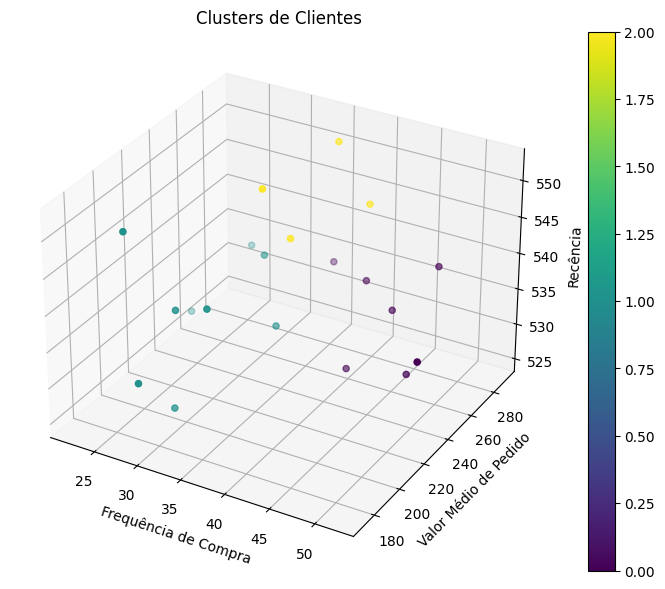

In [23]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotar os clusters
scatter = ax.scatter(
    metrics_df['Frequencia'],
    metrics_df['Valor Medio Pedido'],
    metrics_df['Recencia'],
    c=metrics_df['Cluster'],
    cmap='viridis'
)

# Adicionar legendas e rótulos
ax.set_xlabel('Frequência de Compra')
ax.set_ylabel('Valor Médio de Pedido')
ax.set_zlabel('Recência')
ax.set_title('Clusters de Clientes')

# Mostrar gráfico
plt.colorbar(scatter)
plt.show()